In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from main_preprocess import output_path_lung_wov_attenuation as input_attenuation


c:\Users\PC\anaconda3\envs\Lungeholdet\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:

attenuation_list = os.listdir('Attenuation')
df = pd.DataFrame(index=[id[27:29] for id in attenuation_list],columns=['Attenuation', 'label', 'average_attenuation'])
for file in attenuation_list:
    arr = np.load('Attenuation/'+file)
    patient_id=file[27:29]
    if int(patient_id) < 14:
        df.loc[str(patient_id),'Attenuation'] = arr
        df.loc[str(patient_id),'label'] = 'sick'
    elif int(patient_id) >= 14:
        df.loc[str(patient_id),'Attenuation'] = arr
        df.loc[str(patient_id),'label'] = 'healty'
df
# labels = ['sick' if int(p_id) < 14 else 'Healthy' for p_id in patient_id ]
# labels

,Attenuation,label,average_attenuation
01,"[429, 399, 307, 174, 14, -53, -61, 260, 159, 5...",sick,NaN
02,"[-278, -277, -259, -209, -161, -108, -50, -329...",sick,NaN
03,"[132, 275, -82, 146, -165, -44, -276, -160, -3...",sick,NaN
04,"[232, 200, 203, 143, 110, 40, 264, 169, 141, 1...",sick,NaN
05,"[-235, -189, -167, -108, -104, -345, -339, -29...",sick,NaN
06,"[-815, -778, -531, -784, -643, -482, -790, -73...",sick,NaN
07,"[-396, -415, -403, -388, -381, -371, -364, -43...",sick,NaN
08,"[-91, -140, -141, -166, -204, -258, -247, -155...",sick,NaN
09,"[-243, -192, -138, -305, -240, -179, -346, -26...",sick,NaN
10,"[-160, -175, -168, -132, -114, -206, -235, -22...",sick,NaN


In [3]:
patient_id

'19'

<Axes: xlabel='attenuation', ylabel='Count'>

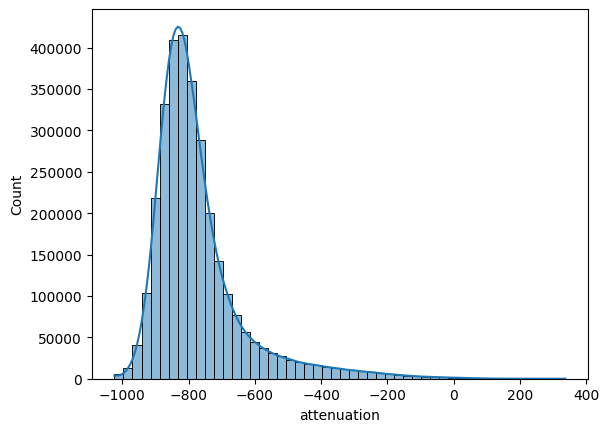

In [3]:
sns.histplot(data=df, x="attenuation", kde=True, bins=50)

In [32]:
test = df.loc['05','sick']
df.columns.name = 'id'
df.sick.index.name = 'test'
df

KeyError: 'sick'

In [35]:
df['Attenuation'].groupby('label')

KeyError: 'label'

(-1000.0, 0.0)

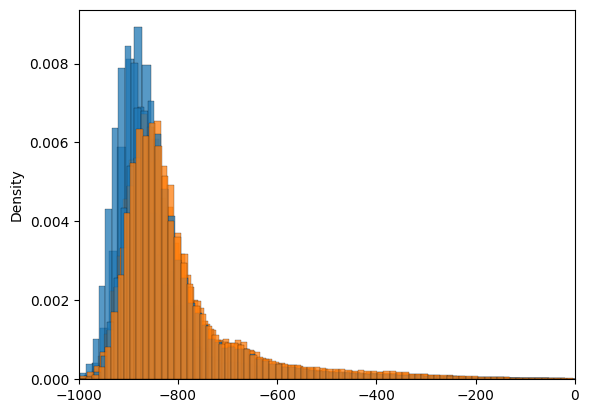

In [10]:
current_palette = sns.color_palette()
fig, ax = plt.subplots()
for data_sick,data_healthy in zip(df['sick'].dropna(),df['healthy'].dropna()):
    sns.histplot(data=data_sick, bins=150, kde=False,stat='density',ax=ax, color=current_palette[0])
    sns.histplot(data=data_healthy, bins=150, kde=False,stat='density', ax=ax, color=current_palette[1])
ax.set_xlim([-1000,0])

In [14]:
test1 = np.load('Attenuation/attenuation_Lung-Pilot-1_0001_SERIES0021.npy')
print(test1)
np.savez_compressed(f'Attenuation/Lung_{pat_id}', a=test1)

[ 429  399  307 ... -188 -167 -123]


In [27]:
[np.mean(sick) for sick in df['sick']]

[-842.7697910179738,
 -843.1626698000874,
 -803.534045365616,
 -839.6045966029043,
 -799.7738895698216,
 -849.5310297968053,
 -819.4287424553688,
 -849.6612172320234,
 -869.009087597167,
 -808.0007022775598,
 -796.9093003724489,
 -868.4489824428596,
 -810.4173505970059,
 nan,
 nan,
 nan]

In [30]:
df['healthy_mean'] = [np.mean(sick) for sick in df['healthy']]
df

id,sick,healthy,healthy_mean
test,,,
01,"[429, 399, 307, 174, 14, -53, -61, 260, 159, 5...",NaN,NaN
02,"[-278, -277, -259, -209, -161, -108, -50, -329...",NaN,NaN
03,"[132, 275, -82, 146, -165, -44, -276, -160, -3...",NaN,NaN
04,"[232, 200, 203, 143, 110, 40, 264, 169, 141, 1...",NaN,NaN
05,"[-235, -189, -167, -108, -104, -345, -339, -29...",NaN,NaN
06,"[-815, -778, -531, -784, -643, -482, -790, -73...",NaN,NaN
07,"[-396, -415, -403, -388, -381, -371, -364, -43...",NaN,NaN
08,"[-91, -140, -141, -166, -204, -258, -247, -155...",NaN,NaN
09,"[-243, -192, -138, -305, -240, -179, -346, -26...",NaN,NaN


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

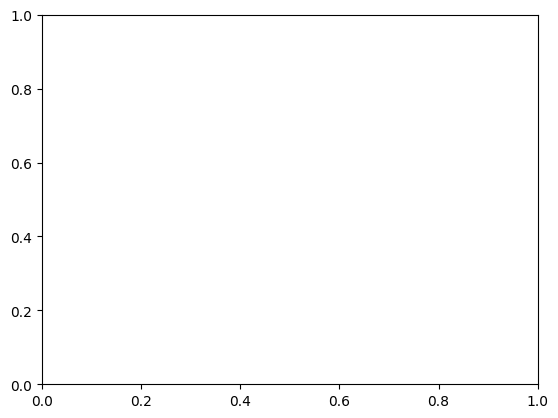

In [9]:
fig, ax = plt.subplots()
for a in [df['sick'], df['healthy']]:
    sns.histplot(a, bins=range(-999,300,100),ax=ax, kde=True)
ax.set_xlim([-1000,0])

In [4]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('/Users/jacob/OneDrive/Uni/7. Semester/Bachelor/Data_preprocess') if isfile(join('C:/Users/jacob/OneDrive/Uni/7. Semester/Bachelor/Data_preprocess', f))]
onlyfiles

['data_preprocess.py',
 'main_preprocess.py',
 'preprocess_tools.py',
 'test.npy',
 'visualization.ipynb']

In [10]:
import platform
platform.version()

'10.0.22631'